In [1]:
import time
import subprocess
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt

plt.style.use("default")

In [2]:
# generating sample
# all sample written to test.txt
def sample_gen(N,M,filename="test.txt"):
    if N>M*(M-1)/2:
        print("ERROR!")
        return
    MAXID,MAXPRICE = 1000,10000
    with open(filename,"w") as f:
        f.write("{:d} {:d}\n".format(N,M))
        name_range = np.arange(1,MAXID)
        price_range = np.arange(1,MAXPRICE)
        names = random.choice(name_range,M,replace=False)
        prices = random.choice(price_range,M,replace=False)
        edges = set()
        while len(edges)<N:
            n1,n2 = random.choice(names,2,replace=True)
            if n1==n2:
                continue
            if (n1,n2) not in edges and (n2,n1) not in edges:
                edges.add((n1,n2))
        f.writelines("{} {}\n".format(*i) for i in edges)
        f.writelines("{} {}\n".format(*i) for i in zip(names,prices))

In [3]:
def auto_comparison(N,M,filename="test.txt",NUM=20):
    count=0
    while count<NUM:
        sample_gen(N,M,filename)
        if subprocess.run("./script.sh {}".format(filename), shell=True).returncode != 0:
            print("Found bug!")
            break;
        count+=1
    else:
        print("Everything is fine!")

In [18]:
auto_comparison(100,35,NUM=10)

Everything is fine!


In [22]:
sample_gen(1,100)

In [6]:
N = np.arange(0,101,10)
M = np.arange(20,61,10)
times = np.zeros(N.shape+M.shape)

In [7]:
N,M,times

(array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 array([20, 30, 40, 50, 60]),
 array([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]))

In [8]:
def get_time(N,M,filename="final_test.txt"):
    program = "./safefruit.exe"
    sample_gen(N,M,filename)
    with open(filename,"r") as f:
        data = "".join(f.readlines()).encode("utf-8")
        _begin_time = time.time()
        subprocess.run(program,input=data)
        _end_time = time.time()
    return (_end_time-_begin_time)*1e3
uget_time = np.vectorize(get_time)

In [ ]:
# do ave to smooth
Epoch = 1
for i in range(Epoch):
    times+=uget_time(N[:,None],M[None,:])
times/=Epoch

Text(0.5, 0, 'M')

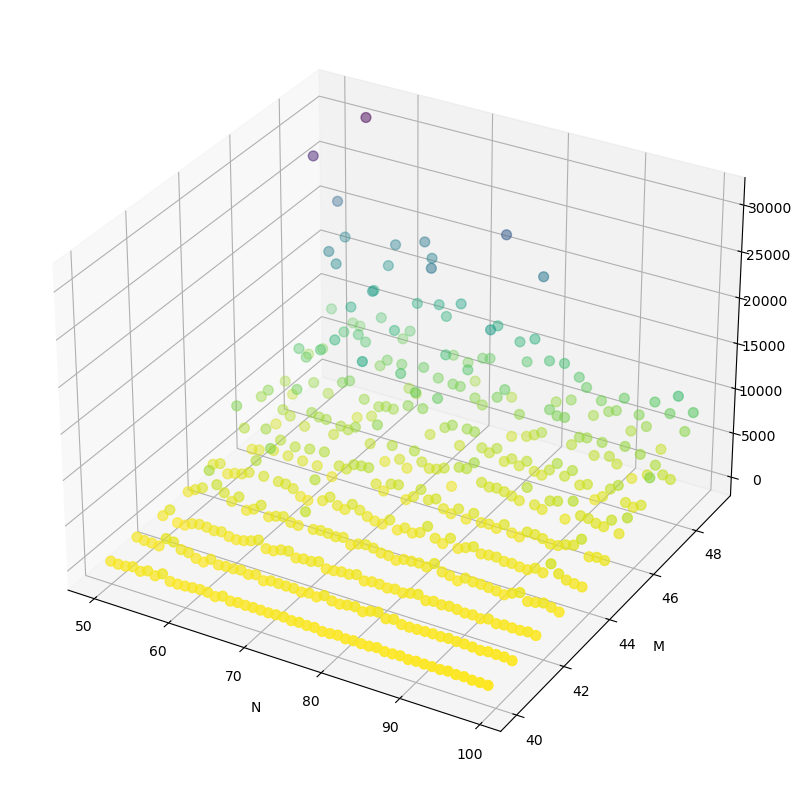

In [215]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.axes(projection="3d")
X,Y = np.meshgrid(N,M)
ax.scatter(X,Y,times.T,c=-times.T,s=50)
ax.set_xlabel("N")
ax.set_ylabel("M")

In [208]:
times.shape

(50, 10)

In [209]:
np.savetxt("test_res_m_40_49_n_50_100.txt",times)

In [219]:
t == times

array([[ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True,  True,  True,  True,  True,
         True],
       [ True,  True,  True,  True,  True, 

In [163]:
np.savetxt("test_res_m30_39.txt",times)

In [164]:
ttimes = np.loadtxt("test_res_m30_39.txt")

Text(0.5, 0, 'M')

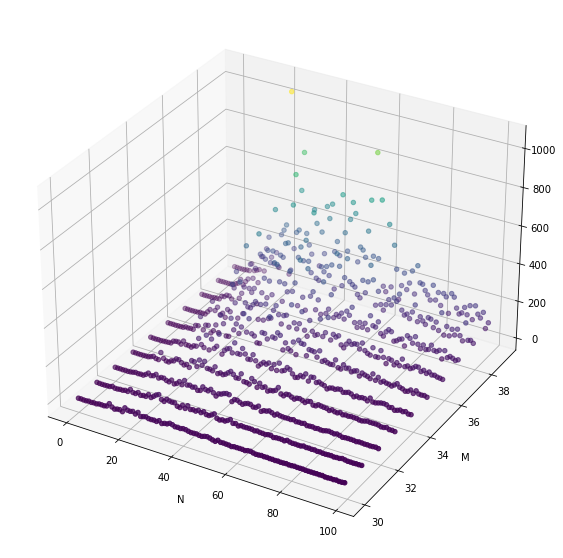

In [165]:
fig = plt.figure()
fig.set_size_inches(10,10)
ax = plt.axes(projection="3d")
X,Y = np.meshgrid(N,M)
ax.scatter(X,Y,ttimes.T,c=ttimes.T)
ax.set_xlabel("N")
ax.set_ylabel("M")

In [172]:
t1 = np.loadtxt("test_res_m15_29.txt")
t2 = np.loadtxt("test_res_m30_39.txt")
t = np.concatenate((t1.T,t2.T))
t.shape

(25, 100)

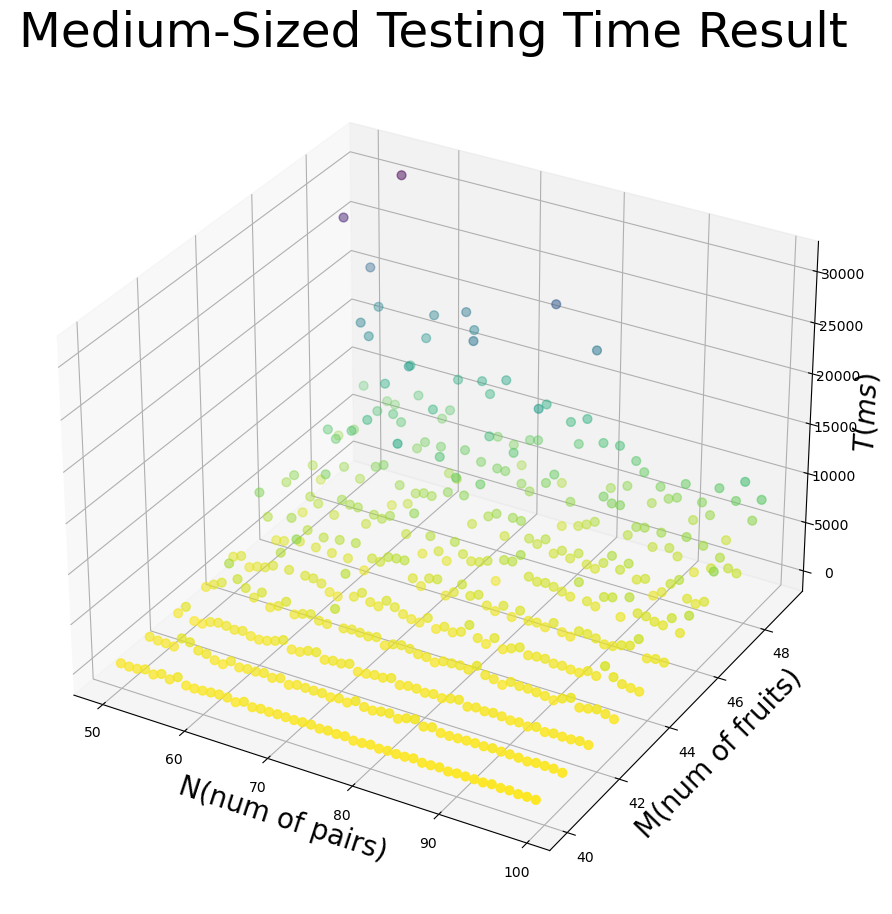

In [220]:
N = np.arange(50,100)
M = np.arange(40,50)
t = np.loadtxt("test_res_m_40_49_n_50_100.txt")
fig = plt.figure()
fig.set_size_inches(11,11)
ax = plt.axes(projection="3d")
X,Y = np.meshgrid(N,M)
ax.scatter(X,Y,t.T,c=-t.T,s=40)
ax.set_xlabel("N(num of pairs)",fontsize=20)
ax.set_ylabel("M(num of fruits)",fontsize=20)
ax.set_zlabel(r"$T(ms)$",fontsize=20)
title="Medium-Sized Testing Time Result"
ax.set_title(title,fontsize=35)
fig.savefig("{}1.png".format(title),dpi=400)

In [264]:
N = np.arange(0,100)
M = np.arange(15,40)
t1 = np.loadtxt("test_res_m15_29.txt")
t2 = np.loadtxt("test_res_m30_39.txt")
t3 = np.loadtxt("test_res_m_40_49_n_50_100.txt")

In [268]:
t1.shape

(100, 15)

In [271]:
np.concatenate((t1.T,t2.T)).shape

(25, 100)

In [267]:
a = t1[:,m_point[cnt]-15]
a.shape,N.shape

((100,), (100,))

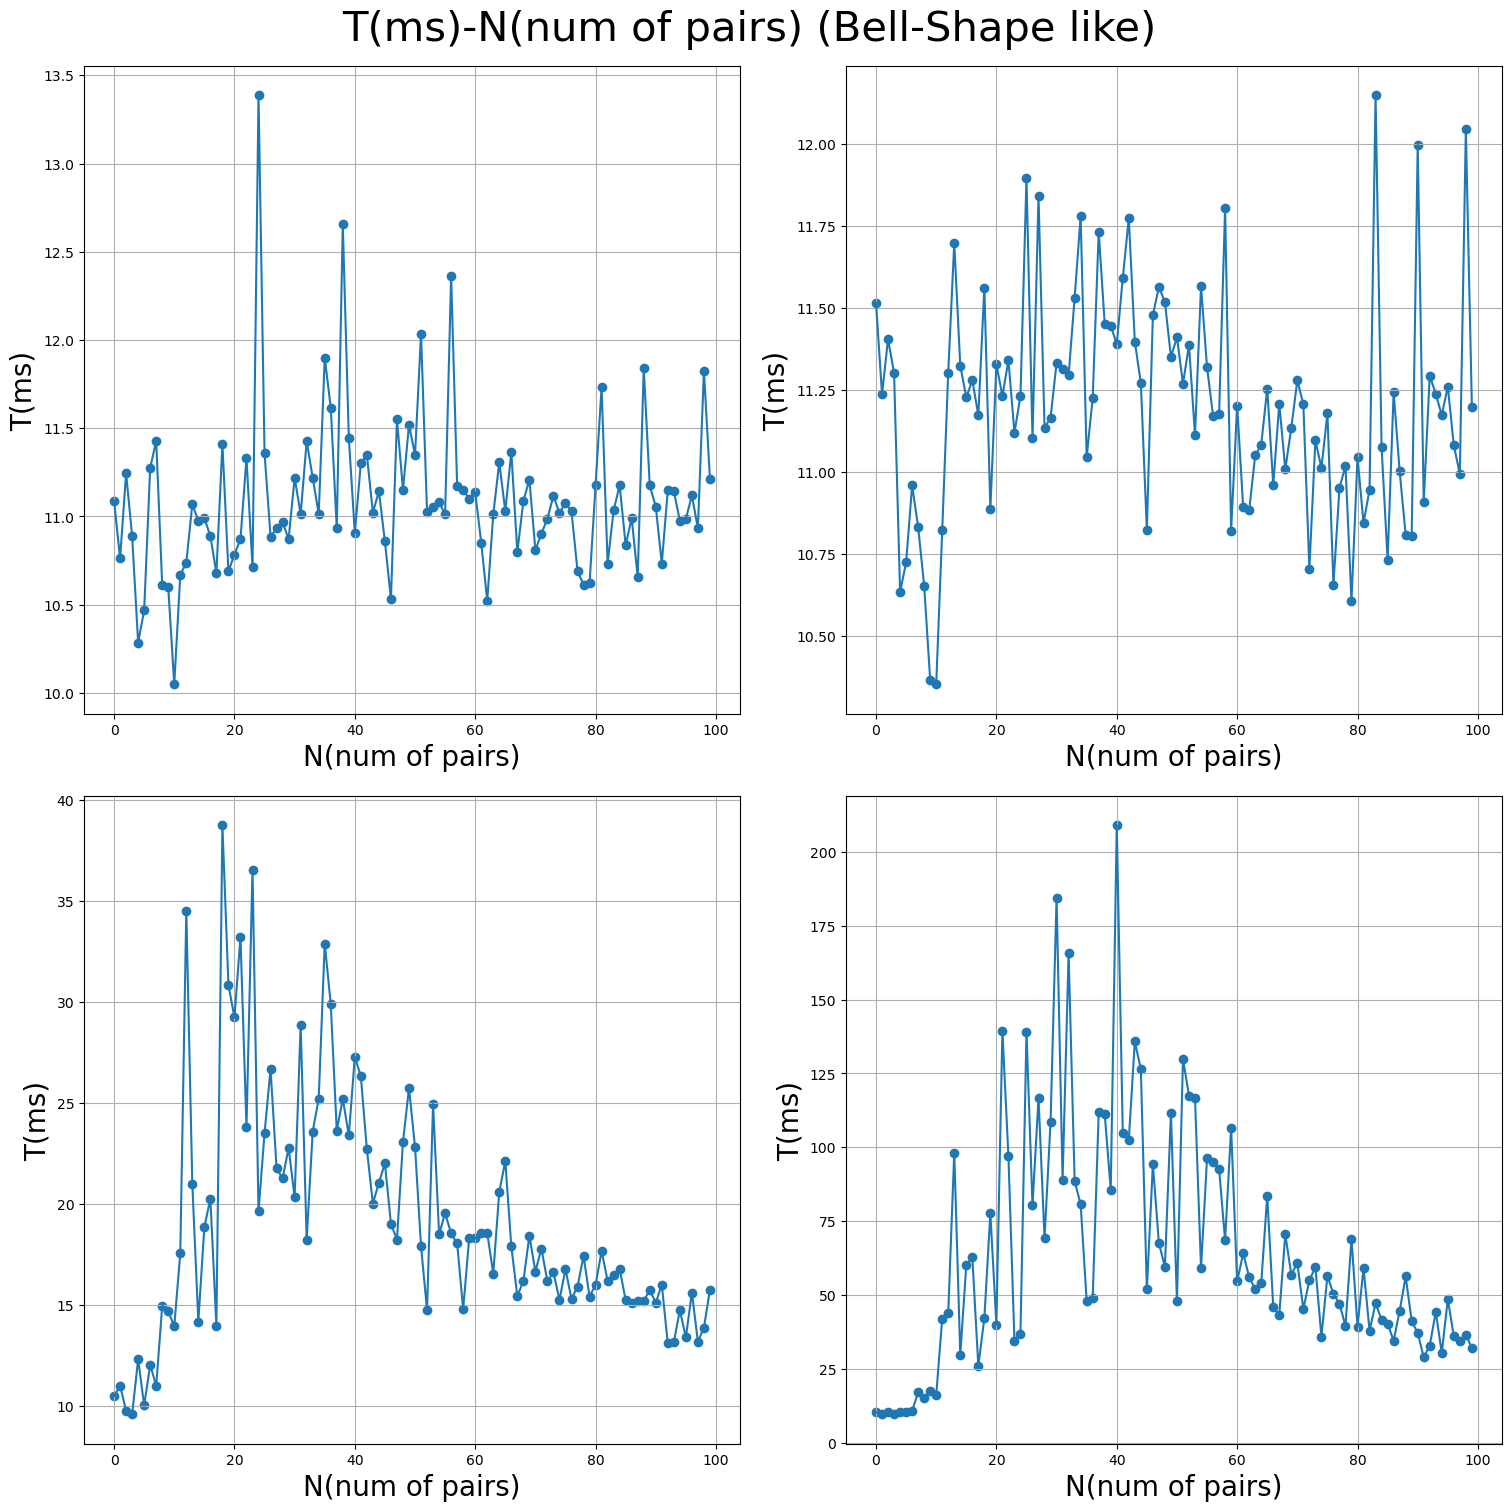

In [284]:
m_point = [15,20,30,35]
t = np.concatenate((t1.T,t2.T))
fig,axs = plt.subplots(2,2,constrained_layout=True)
fig.set_size_inches((15,15))
cnt=0
for i in axs:
    for j in i:
        j.scatter(N,t[m_point[cnt]-15])
        j.set_xlabel("N(num of pairs)",fontsize=20)
        j.set_ylabel("T(ms)",fontsize=20)
        j.plot(N,t[m_point[cnt]-15])
        j.grid()
        cnt+=1
figtitle="T(ms)-N(num of pairs) (Bell-Shape like) "
fig.suptitle(figtitle,fontsize=30)
fig.savefig(figtitle+".png",dpi=400)

In [276]:
a = [1,10,2,15]
np.convolve(a,[1,1,1],"same")

array([11, 13, 27, 17])

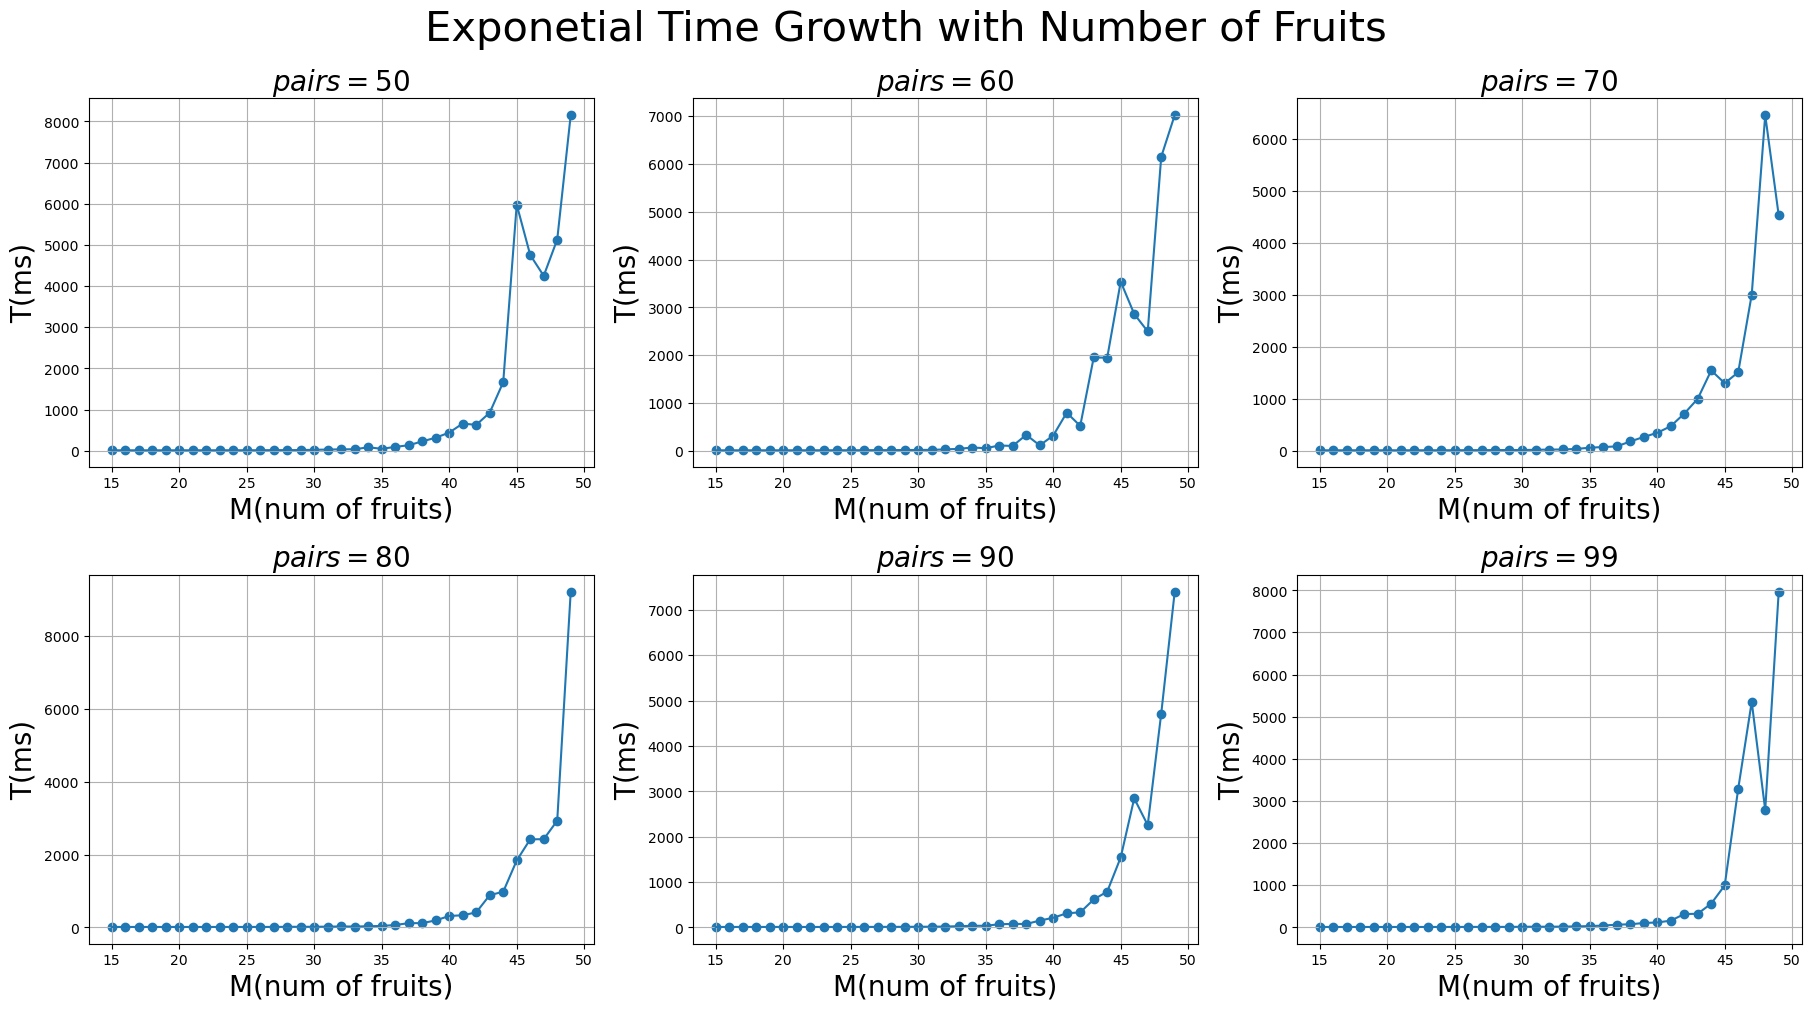

In [256]:
fig,axs = plt.subplots(2,3,constrained_layout=True)
fig.set_size_inches((18,10))
n_point=[50,60,70,80,90,99]
cnt=0
for i in axs:
    for j in i:
        t = np.concatenate((t1[n_point[cnt],:],t2[n_point[cnt],:],t3[n_point[cnt]-50,:]))
        j.scatter(M,t)
        j.plot(M,t)
        j.set_xlabel("M(num of fruits)",fontsize=20)
        j.set_ylabel("T(ms)",fontsize=20)
        j.set_title(r"$pairs = {}$".format(n_point[cnt]),fontsize=20)
        j.grid()
        cnt+=1
figtitle="Exponetial Time Growth with Number of Fruits"
fig.suptitle(figtitle,fontsize=30)
fig.savefig(figtitle+".png",dpi=400)


In [230]:
t.shape

(35,)

In [168]:
a = np.arange(9).reshape(3,3)
a = np.arange(9).reshape(3,3)
np.concatenate((a,a))

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8],
       [0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [169]:
np.concatenate?

Docstring:
concatenate((a1, a2, ...), axis=0, out=None)

Join a sequence of arrays along an existing axis.

Parameters
----------
a1, a2, ... : sequence of array_like
    The arrays must have the same shape, except in the dimension
    corresponding to `axis` (the first, by default).
axis : int, optional
    The axis along which the arrays will be joined.  If axis is None,
    arrays are flattened before use.  Default is 0.
out : ndarray, optional
    If provided, the destination to place the result. The shape must be
    correct, matching that of what concatenate would have returned if no
    out argument were specified.

Returns
-------
res : ndarray
    The concatenated array.

See Also
--------
ma.concatenate : Concatenate function that preserves input masks.
array_split : Split an array into multiple sub-arrays of equal or
              near-equal size.
split : Split array into a list of multiple sub-arrays of equal size.
hsplit : Split array into multiple sub-arrays horizontally 

In [60]:
testfile = "test.txt"
subprocess.run("./safefruitbench.exe < {}".format(testfile),shell=True,capture_output=True)

CompletedProcess(args='./safefruitbench.exe < test.txt', returncode=139, stdout=b'', stderr=b'Segmentation fault\n')

In [86]:
# generating experiment groups
program_name = "../safefruit"
tags = ["NO_PRUNE_"+ i for i in "ABC"]
for tag in tags:
    subprocess.run("gcc {0}.c -o {0}{1}.exe -D{1}".format(program_name,tag),shell=True)

In [13]:
subprocess.run("./{}.exe < ./samples/test1.txt".format(program_name), shell=True,stdout=subprocess.PIPE)

CompletedProcess(args='./safefruit.exe < ./samples/test1.txt', returncode=0, stdout=b'12\n002 004 006 008 009 014 015 016 017 018 019 020\n239\n')